[[ 0.81818182]
 [-2.64545455]
 [ 2.63636364]]


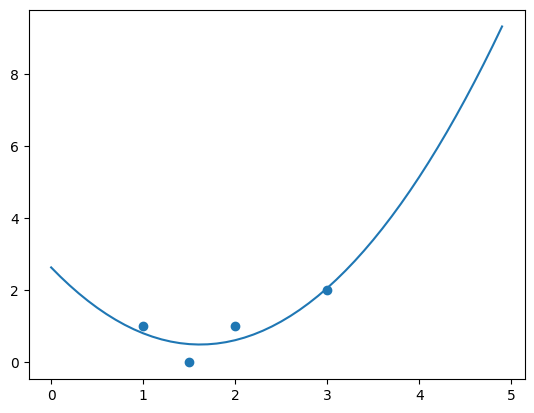

In [24]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array( [ [1, 1],
                [2, 1],
                [1.5, 0],
                [3, 2]])

y = np.array ([[1],
               [1],
               [0],
               [2]])

phi = np.array ([[1, 1, 1],
                 [4, 2, 1],
                 [2.25, 1.5 ,1],
                 [9, 3, 1]])

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)

print(w)
x = np.reshape(np.arange(0, 5, .1), (50, 1))
phi2 = np.hstack((x*x, x, np.ones((50,1))))
yhat = phi2.dot(w)
plt.scatter(X[:, 0], y[:, 0])
plt.plot(x, yhat)
plt.show()

[[-0.00648396]
 [ 4.00179153]
 [ 0.00978456]
 [-0.00761287]
 [ 0.99234712]
 [ 2.99409409]
 [ 3.9915772 ]
 [ 2.98075647]
 [ 0.98333889]
 [ 1.0097196 ]
 [ 0.86600004]]


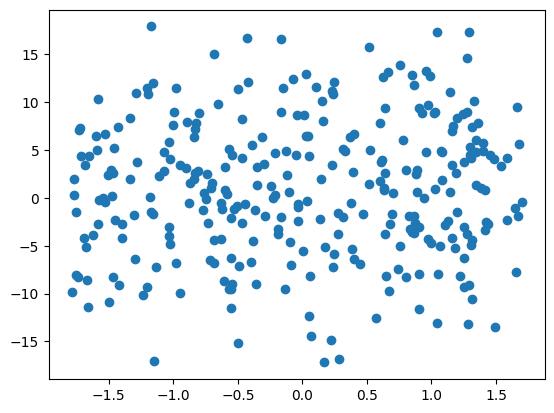

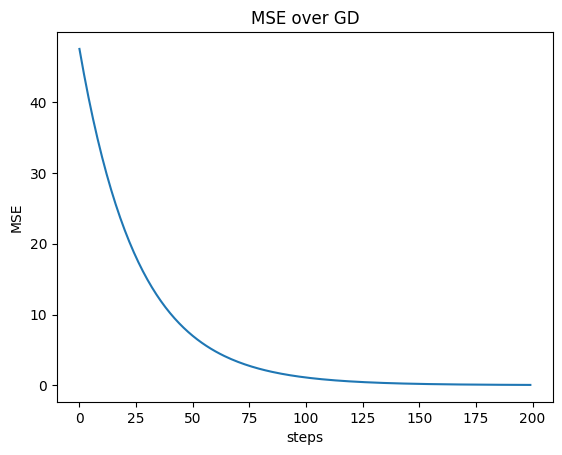

Side by side comparison ŷ vs y
[[ -0.2153658   -0.31      ]
 [-16.25982385 -16.86      ]
 [  1.45969054   1.36      ]
 [ 12.39777555  12.75      ]
 [  7.52834537   7.91      ]
 [ -3.16719409  -2.75      ]
 [ -0.506676    -0.54      ]
 [-10.97843309 -11.51      ]
 [ -4.12319017  -4.01      ]
 [  3.34430783   3.08      ]
 [ -8.07160215  -8.23      ]
 [ -0.03358242  -0.14      ]
 [  2.1609318    2.56      ]
 [ -6.86297221  -6.87      ]
 [  4.57333207   4.43      ]
 [  1.68624713   1.98      ]
 [  3.71667839   3.76      ]
 [  3.94546074   4.16      ]
 [  6.25993038   6.67      ]
 [ -6.92088656  -7.21      ]]


In [61]:
import numpy as np
from numpy import genfromtxt
from numpy.random import randn

X = genfromtxt('stock_prediction_data_scaled.csv', delimiter=',')
y = np.reshape(genfromtxt('stock_price.csv', delimiter=','), (-1, 1))
ones = np.ones((len(X), 1))
phi = np.hstack((X, ones))
d = phi.shape[1]
n = X.shape[0]
w1 = np.linalg.inv(phi.T.dot(phi)).dot(phi.T.dot(y))
print(w1)
plt.scatter(X[:, 0], y[:, 0])
plt.show()
w = randn(d, 1)
def f(w):
	fₒ = 0						
	for ϕᵢ, yᵢ in zip(phi,y):
		ϕᵢ = np.reshape(ϕᵢ, (d,1))		
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
	return ((1/n)*fₒ).item()	
#	
def ᐁf(w):
	
	grads = np.zeros((d, 1))	
	for ϕᵢ,yᵢ in zip(phi,y):	
		ϕᵢ = np.reshape(ϕᵢ, (d,1)) 
		grads += (w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ
	return 2/n * grads
#

mse_list = []
for i in range(200):
	w = w - 0.01 * ᐁf(w)
	mse_list.append((f(w)))


plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 	

ŷ = phi.dot(w)
Y = np.hstack((ŷ, y))
print('Side by side comparison ŷ vs y') 
print(Y[0:20,:])

In [60]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


X = genfromtxt('stock_prediction_data_scaled.csv', delimiter=',')
y = np.reshape(genfromtxt('stock_price.csv', delimiter=','), (-1, 1))

poly = PolynomialFeatures(10)
newX = poly.fit_transform(X)

print(newX)

[[ 1.00000000e+00  3.90000000e-02 -1.21400000e+00 ...  9.63710223e+00
   9.97677058e+00  1.03284109e+01]
 [ 1.00000000e+00  2.81000000e-01 -1.47000000e+00 ...  1.63781562e-01
   1.70259943e-01  1.76994576e-01]
 [ 1.00000000e+00  1.34600000e+00 -3.52000000e-01 ...  5.63988747e-04
  -4.58051683e-04  3.72013353e-04]
 ...
 [ 1.00000000e+00  6.33000000e-01  1.08300000e+00 ...  2.11167103e-02
   2.03625421e-02  1.96353085e-02]
 [ 1.00000000e+00  2.25000000e-01 -9.80000000e-01 ...  3.55297149e+01
   7.05002455e+01  1.39890923e+02]
 [ 1.00000000e+00 -1.89000000e-01 -1.15600000e+00 ...  3.34310133e+01
  -3.48168807e+01  3.62601987e+01]]
